In [40]:
import torch
import torch.nn as nn

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

## Step 1 : Generate Regression Dataset

In [41]:
X_numpy, Y_numpy = datasets.make_regression(
                                        n_samples = 5000,
                                        n_features = 1,
                                        noise=20,
                                        random_state=1234
                                        )

In [42]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(-1,1)
n_samples, n_features = X.shape

## Step 2 : Model / Loss Function / Optimizer

In [43]:
model = nn.Linear(n_features, Y.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Step 3 : Training Loop

In [44]:
epoches = range(500)

for epoch in epoches:
    Y_hat = model(X) # Forward Pass
    loss = criterion(Y_hat, Y)
    
    loss.backward() # Calculate Gradients
    optimizer.step() # backward Pass

    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print("Epoch : {} -> Loss : {}".format(epoch+1, round(loss.item(), 3)))

Epoch : 10 -> Loss : 2139.055
Epoch : 20 -> Loss : 1570.079
Epoch : 30 -> Loss : 1187.882
Epoch : 40 -> Loss : 931.124
Epoch : 50 -> Loss : 758.619
Epoch : 60 -> Loss : 642.708
Epoch : 70 -> Loss : 564.817
Epoch : 80 -> Loss : 512.469
Epoch : 90 -> Loss : 477.285
Epoch : 100 -> Loss : 453.635
Epoch : 110 -> Loss : 437.736
Epoch : 120 -> Loss : 427.047
Epoch : 130 -> Loss : 419.86
Epoch : 140 -> Loss : 415.027
Epoch : 150 -> Loss : 411.777
Epoch : 160 -> Loss : 409.591
Epoch : 170 -> Loss : 408.121
Epoch : 180 -> Loss : 407.132
Epoch : 190 -> Loss : 406.467
Epoch : 200 -> Loss : 406.019
Epoch : 210 -> Loss : 405.718
Epoch : 220 -> Loss : 405.515
Epoch : 230 -> Loss : 405.379
Epoch : 240 -> Loss : 405.287
Epoch : 250 -> Loss : 405.225
Epoch : 260 -> Loss : 405.183
Epoch : 270 -> Loss : 405.155
Epoch : 280 -> Loss : 405.136
Epoch : 290 -> Loss : 405.124
Epoch : 300 -> Loss : 405.115
Epoch : 310 -> Loss : 405.11
Epoch : 320 -> Loss : 405.106
Epoch : 330 -> Loss : 405.103
Epoch : 340 -> Los

In [59]:
P = model(X).detach().numpy().squeeze()
P

array([   1.2339789,  -11.706043 , -162.87206  , ...,  120.11997  ,
        -64.91666  ,   45.861305 ], dtype=float32)

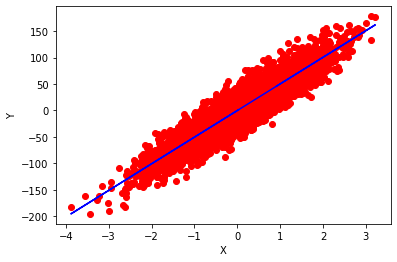

In [61]:
plt.scatter(X_numpy.reshape(-1,), Y_numpy, color='r')
plt.plot(X_numpy.reshape(-1,), P, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()